# this check the quality of the files that pass the criterion

In [1]:
# 1. path to data 
import glob
import pandas as pd
import json
import numpy as np

In [2]:
def getQualityDf(file_path, generation='gen1'):
    json_desp = file_path + '/summary/*.json'
    json_list = glob.glob(json_desp)
    
    file_names = []
    errs_interrupts_nums = []
    acc_overall_avgs = []
    quality_daylightSavingsCrossovers = []
    quality_goodCalibrations = []
    quality_goodWearTimes = []
    
    for my_file in json_list:
        with open(my_file) as f:
            data = json.load(f)

        file_names.append(data['file-name'])
        errs_interrupts_nums.append(data['errs-interrupts-num'])
        acc_overall_avgs.append(data['acc-overall-avg'])
        quality_daylightSavingsCrossovers.append(data['quality-daylightSavingsCrossover'])
        quality_goodCalibrations.append(data['quality-goodCalibration'])
        quality_goodWearTimes.append(data['quality-goodWearTime'])
    
    mydata = {"file_name": file_names,
         "errs_interrupts_num": errs_interrupts_nums,
         "acc_overall_avg": acc_overall_avgs,
         "quality_daylightSavingsCrossover": quality_daylightSavingsCrossovers,
         "quality_goodCalibration": quality_goodCalibrations,
         "quality_goodWearTime": quality_goodWearTimes}
    mydf = pd.DataFrame(mydata)
    mydf['generation'] = generation
    return mydf

In [3]:
data_path ='/well/doherty/projects/raine/gen1_26/gt3x/wrist/oneDayOct15'
gen1df = getQualityDf(data_path, generation='gen1')

In [4]:
data_path ='/well/doherty/projects/raine/gen2_22/gt3x/wrist/oneDayOct15'
gen2df = getQualityDf(data_path, generation='gen2')

In [5]:
frames = [gen1df, gen2df]
allDF = pd.concat(frames, sort=True)

In [6]:
allDF

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime
0,37.99125,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,0,1,0
1,37.52288,108,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,0,1,0
2,25.95954,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,0,1,0
3,17.13478,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,0,1,0
4,17.41644,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,0,1,0
...,...,...,...,...,...,...,...
885,3.41579,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,0,1,0
886,18.71490,87,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,0,1,0
887,19.95177,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,0,1,0
888,19.65843,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,0,1,0


# filter out that ones that do not pass the quality checks
1. generate summary statistics about the ones that don't pass 

In [7]:
allDF['quality_daylightSavingsCrossover'] = allDF['quality_daylightSavingsCrossover'].astype(bool)
allDF['quality_goodCalibration'] = allDF['quality_goodCalibration'].astype(bool)
allDF['quality_goodWearTime'] = allDF['quality_goodWearTime'].astype(bool)

In [8]:
allDF

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime
0,37.99125,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False
1,37.52288,108,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False
2,25.95954,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False
3,17.13478,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False
4,17.41644,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False
...,...,...,...,...,...,...,...
885,3.41579,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False
886,18.71490,87,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False
887,19.95177,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False
888,19.65843,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False


In [9]:
allDF['interrupts_num_ok'] = allDF['errs_interrupts_num'] <= 10
allDF['acc_overall_avg_ok'] = allDF['acc_overall_avg'] <= 100
allDF['quality_goodCalibration']
allDF['quality_daylightSavingsCrossover']

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
888    False
889    False
Name: quality_daylightSavingsCrossover, Length: 1929, dtype: bool

In [11]:
allDF['quality_goodCalibration'].value_counts()

True     1709
False     220
Name: quality_goodCalibration, dtype: int64

In [12]:
allDF['quality_daylightSavingsCrossover'].value_counts()

False    1929
Name: quality_daylightSavingsCrossover, dtype: int64

In [13]:
allDF['quality_goodWearTime'].value_counts()

False    1929
Name: quality_goodWearTime, dtype: int64

In [14]:
allDF['interrupts_num_ok'].value_counts()

True     1654
False     275
Name: interrupts_num_ok, dtype: int64

In [15]:
allDF['acc_overall_avg_ok'].value_counts()

True     1924
False       5
Name: acc_overall_avg_ok, dtype: int64

In [16]:
gen1df_full = allDF[allDF['generation'] == 'gen1']
gen2df_full = allDF[allDF['generation'] == 'gen2']

In [21]:
gen1df_passed = gen1df_full[(gen1df_full['acc_overall_avg_ok'] & gen1df_full['interrupts_num_ok'])]



In [22]:
gen1df_passed

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,37.99125,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
2,25.95954,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
3,17.13478,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
4,17.41644,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
5,21.94561,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...
1034,16.63257,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
1035,15.08004,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
1036,29.73245,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
1037,21.86456,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True


In [23]:
gen1df_full.to_csv('/well/doherty/projects/raine/gen1_26/gt3x/wrist/oneDayOct15/quality.csv')

In [24]:
gen1df_full['quality_goodWearTime'].value_counts()

False    1039
Name: quality_goodWearTime, dtype: int64

In [25]:
gen2df_full['quality_goodWearTime'].value_counts()

False    890
Name: quality_goodWearTime, dtype: int64

In [37]:
non_passDFGen = allDF[~(allDF['acc_overall_avg_ok'] & allDF['interrupts_num_ok'] & allDF['quality_goodCalibration'])]
gen1df_non_pass = gen1df_full[~(gen1df_full['interrupts_num_ok'])]
gen2df_non_pass = gen2df_full[~(gen2df_full['interrupts_num_ok'])]

In [39]:
gen1df_full

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,37.99125,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
1,37.52288,108,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,False,True
2,25.95954,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
3,17.13478,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
4,17.41644,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...
1034,16.63257,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
1035,15.08004,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
1036,29.73245,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
1037,21.86456,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True


In [42]:
import re
import datetime
%matplotlib inline 


def date_parser(t):
    '''
    Parse date a date string of the form e.g.
    2020-06-14 19:01:15.123+0100 [Europe/London]
    '''
    tz = re.search(r'(?<=\[).+?(?=\])', t)
    if tz is not None:
        tz = tz.group()
    t = re.sub(r'\[(.*?)\]', '', t)
    return pd.to_datetime(t, utc=True).tz_convert(tz)



In [50]:
def get_epoch_path(data_path, gt3x_path):
    file_name = gt3x_path.split('/')[-1]
    file_name = file_name[:-5]
    file_name = data_path + "/" + file_name + '-epoch.csv.gz'
    return file_name

0       False
1       False
2       False
3       False
4       False
        ...  
1034    False
1035    False
1036    False
1037    False
1038    False
Name: errs_interrupts_num, Length: 1039, dtype: bool

In [94]:
gen1df_full['test_interrupts_num_ok'] =  (gen1df_full['errs_interrupts_num'] <= 10) & (gen1df_full['errs_interrupts_num'] >= 1)
gen2df_full['test_interrupts_num_ok'] =  (gen2df_full['errs_interrupts_num'] <= 10) & (gen2df_full['errs_interrupts_num'] >= 1)




/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
gen2df_full['test_interrupts_num_ok'].value_counts()
test_new = gen2df_full[gen2df_full['test_interrupts_num_ok'] == True]

In [93]:
test_new

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok,test_interrupts_num_ok
0,33.53756,41,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
59,12.18071,11,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,False,False,False,True,True
210,16.20860,11,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
219,26.32347,17,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
382,36.72457,49,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
420,28.25862,33,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
422,39.39892,25,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
460,43.00333,16,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
522,17.09585,50,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True
592,49.81107,15,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,True


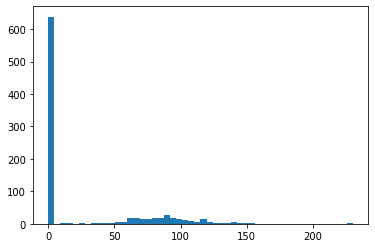

In [95]:

plt.hist(gen2df_full['errs_interrupts_num'], bins=50)
plt.show()

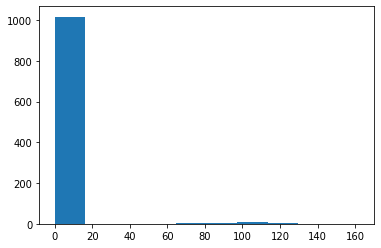

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.hist(gen1df_full['errs_interrupts_num'], bins=10)
plt.show()



In [51]:
gt3_path = '/well/doherty/projects/raine/gen1_26/gt3x/wrist/843822_wrist_2016-08-30.gt3x'
d_path = '/well/doherty/projects/raine/gen1_26/gt3x/wrist/oneDayOct15/epoch'
get_epoch_path(d_path, gt3_path)

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/oneDayOct15/epoch/843822_wrist_2016-08-30-epoch.csv.gz'

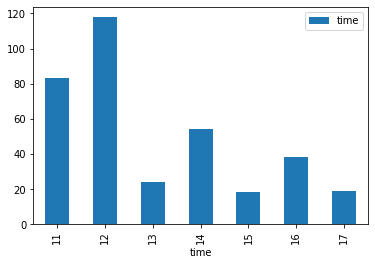

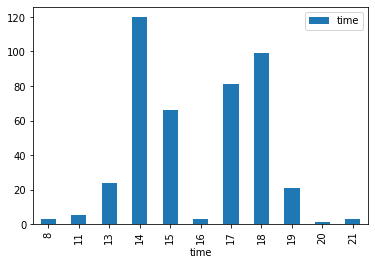

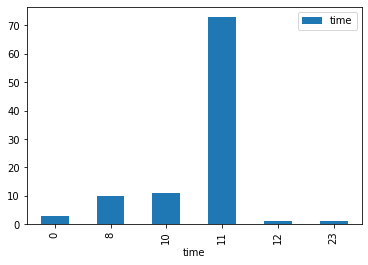

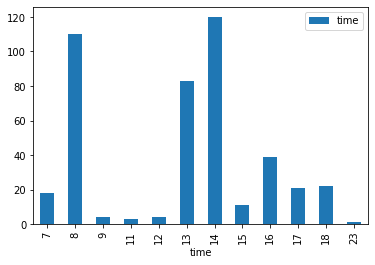

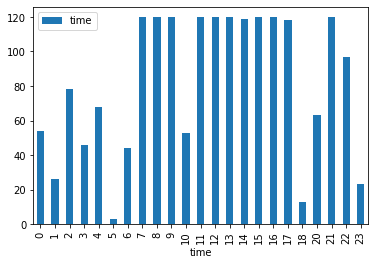

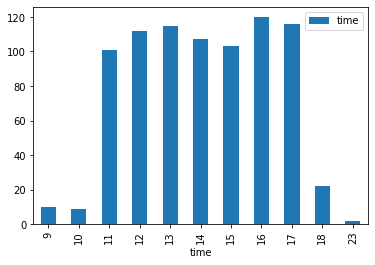

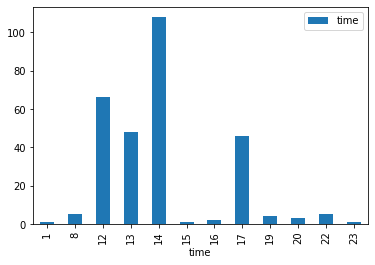

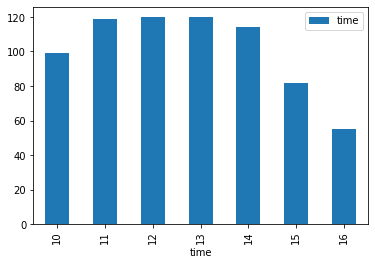

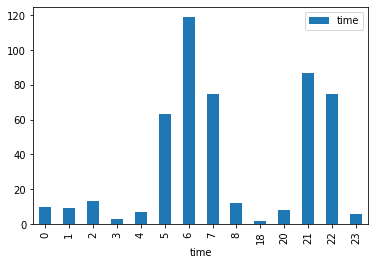

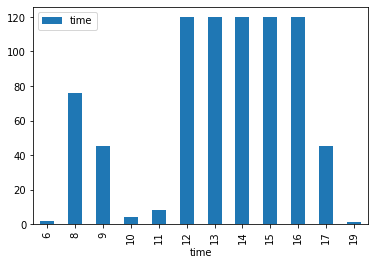

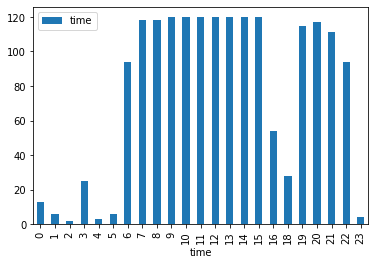

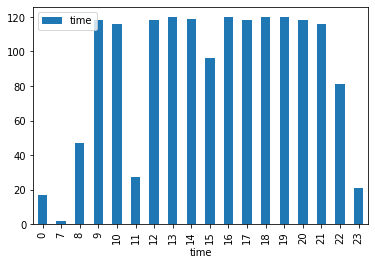

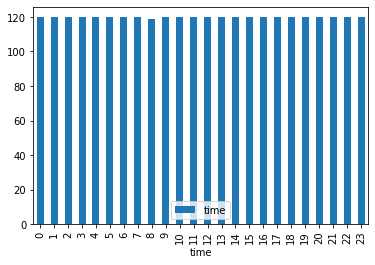

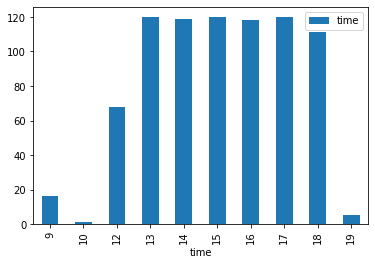

In [97]:
gen1df_non_pass
for i in range(len(test_new)):
    gt3x_path = test_new.iloc[i]['file_name']
    d_path = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/oneDayOct15/epoch'
    epoch_dir = get_epoch_path(d_path, gt3x_path)
    epochDF = pd.read_csv(epoch_dir, index_col=['time'],
                parse_dates=['time'], date_parser=date_parser)
    epochDF['time'] = epochDF.index
    newData = epochDF[['time']]
    
    newData.groupby(newData["time"].dt.hour).count().plot(kind="bar")

In [122]:
passDFGen2.iloc[50]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/197956_wrist_2013-11-09.gt3x'

In [115]:
non_passDFGen2 = gen2df_full[~(gen2df_full['acc_overall_avg_ok'] & gen2df_full['interrupts_num_ok'] &  gen2df_full['quality_goodWearTime'] & gen2df_full['quality_goodCalibration'])]
passDFGen2 = gen2df_full[(gen2df_full['acc_overall_avg_ok'] & gen2df_full['interrupts_num_ok'] &  gen2df_full['quality_goodWearTime'] & gen2df_full['quality_goodCalibration'])]


passDFGen2

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
2,22.71658,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
11,21.67594,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
15,23.33114,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
17,29.70843,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
18,24.12771,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...
876,31.64618,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
877,20.82818,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
881,22.00981,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
888,24.44832,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True


In [50]:
non_passDFGen2

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,49.42321,258,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
1,51.34072,139,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
3,39.04724,461,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
9,26.78790,784,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
16,36.38511,666,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
874,19.84819,105,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
878,32.12641,108,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
882,17.23105,204,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
883,20.93450,109,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True


In [19]:
non_passDFGen2 =  gen2df_full[~(gen2df_full['interrupts_num_ok'] )]
passDFGen2 = gen2df_full[(gen2df_full['interrupts_num_ok'] )]
non_passDFGen1 =  gen1df_full[~(gen1df_full['interrupts_num_ok'] )]
passDFGen1 = gen1df_full[(gen1df_full['interrupts_num_ok'] )]



In [20]:
passDFGen1.iloc[2]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/920185_wrist_2016-10-17.gt3x'

In [114]:
non_passDFGen2

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,49.42321,258,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
1,51.34072,139,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
3,39.04724,461,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
9,26.78790,784,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
16,36.38511,666,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
874,19.84819,105,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
878,32.12641,108,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
882,17.23105,204,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
883,20.93450,109,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True


In [38]:
passDFGen2.iloc[10]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/377870_wrist_2012-09-10.gt3x'

In [47]:
# raw look at 
non_passDFGen2.iloc[0]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/605065_wrist_2014-04-04.gt3x'

In [52]:
non_passDFGen2.iloc[5]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/133608_wrist_2012-10-02.gt3x'

In [49]:
non_passDFGen2.iloc[2]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/864012_wrist_2013-01-24.gt3x'

In [97]:
raw_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/raw/605065_wrist_2014-04-04.csv.gz'
epoch_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/605065_wrist_2014-04-04-epoch.csv.gz'
rawDF = pd.read_csv(raw_dir,compression='gzip', skiprows= 189000, nrows=90000)

In [103]:
epochDF[212:218]

,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,yStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
time,,,,,,,,,,,,,,,,,,,,,
2014-04-04 13:05:30.033000+08:00,0.003181,0.003429,-0.413184,-0.148877,0.901654,0.034619,0.015070,0.049049,0.002451,0.001322,...,0.000044,0.000040,0.000036,0.000032,1.0,900,1,0,0,271
2014-04-04 13:09:30.033000+08:00,0.002441,0.057002,-0.408013,-0.038457,0.854227,0.281487,0.194893,0.246247,0.024556,0.017961,...,0.000132,0.000118,0.000106,0.000095,1.0,900,0,0,0,181
2014-04-04 13:10:00.033000+08:00,0.024382,0.039352,-0.854231,0.240834,0.032605,2.192021,2.448211,3.147144,0.224709,0.206137,...,0.002484,0.001988,0.002217,0.001435,1.0,900,1,0,0,871
2014-04-04 13:19:00.033000+08:00,0.065787,0.120026,-0.663765,0.442360,-0.115114,4.783288,3.893830,5.012802,0.445727,0.244945,...,0.003260,0.003234,0.003265,0.003239,1.0,900,0,0,0,271
2014-04-04 13:19:30.033000+08:00,0.002467,0.003675,0.039023,0.939835,-0.339474,0.534114,0.422583,0.539157,0.031406,0.024806,...,0.000002,0.000001,0.000003,0.000006,1.0,900,1,0,0,361
2014-04-04 13:41:00.033000+08:00,0.006464,0.023064,-0.172431,0.608186,-0.602239,1.261976,0.943320,1.356238,0.310678,0.278416,...,0.000524,0.000488,0.000463,0.000446,1.0,900,1,0,0,480


In [108]:
rawDF[1800:4000]

,2014-04-04 13:04:30.000+0800 [Australia/Perth],-0.404,-0.140,0.901
1800,2014-04-04 13:05:30.033+0800 [Australia/Perth],-0.410,-0.152,0.898
1801,2014-04-04 13:05:30.066+0800 [Australia/Perth],-0.404,-0.155,0.898
1802,2014-04-04 13:05:30.100+0800 [Australia/Perth],-0.410,-0.152,0.904
1803,2014-04-04 13:05:30.133+0800 [Australia/Perth],-0.413,-0.149,0.904
1804,2014-04-04 13:05:30.166+0800 [Australia/Perth],-0.405,-0.149,0.904
...,...,...,...,...
3995,2014-04-04 13:10:13.200+0800 [Australia/Perth],-0.946,0.293,0.023
3996,2014-04-04 13:10:13.233+0800 [Australia/Perth],-0.949,0.296,0.023
3997,2014-04-04 13:10:13.266+0800 [Australia/Perth],-0.952,0.294,0.023
3998,2014-04-04 13:10:13.300+0800 [Australia/Perth],-0.952,0.293,0.017


In [90]:
epochDF = pd.read_csv(epoch_dir, index_col=['time'],
            parse_dates=['time'], date_parser=date_parser)

In [91]:
epochNs = 30 * np.timedelta64(1, 's')
RawInterrupts = np.where(rawDF.index.to_series().diff() > epochNs)[0]
epochInterrupts = np.where(epochDF.index.to_series().diff() > epochNs)[0]


/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  
/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
raw_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/raw/864012_wrist_2013-01-24.csv.gz'
epoch_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/864012_wrist_2013-01-24-epoch.csv.gz'
rawDF = pd.read_csv(raw_dir,compression='gzip', index_col=['time'],
            parse_dates=['time'], date_parser=date_parser, nrows=90000)

In [80]:
rawDF

,x,y,z
time,,,
2013-01-24 20:13:02.033000+08:00,-0.069,-0.125,0.963
2013-01-24 20:13:02.066000+08:00,0.138,-0.259,0.937
2013-01-24 20:13:02.100000+08:00,-0.017,-0.186,0.930
2013-01-24 20:13:02.133000+08:00,0.068,-0.364,0.986
2013-01-24 20:13:02.166000+08:00,-0.145,0.136,0.882
...,...,...,...
2013-01-24 21:50:01.866000+08:00,-0.994,-0.127,-0.194
2013-01-24 21:50:01.900000+08:00,-0.991,-0.151,-0.173
2013-01-24 21:50:01.933000+08:00,-0.962,-0.157,-0.170


In [82]:
epochNs = 30 * np.timedelta64(1, 's')

interrupts = np.where(rawDF.index.to_series().diff() > epochNs)[0]


/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
epochDF.iloc[1:4]

,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,yStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
time,,,,,,,,,,,,,,,,,,,,,
2013-01-24 20:13:32.033000+08:00,0.046060,0.075540,0.272535,0.534350,0.604190,2.977281,2.691767,4.017368,0.307657,0.390460,...,0.000699,0.000531,0.000404,0.000486,1.0,900,1,0,0,571
2013-01-24 20:17:32.033000+08:00,0.432334,0.434608,-0.348202,-0.035615,1.379296,1.249846,1.370354,1.802385,0.090436,0.083833,...,0.000016,0.000016,0.000016,0.000016,1.0,900,0,0,0,31
2013-01-24 20:18:02.033000+08:00,0.029655,0.056015,0.246687,0.517066,0.796022,1.440905,1.551959,1.430289,0.091277,0.164824,...,0.000608,0.000094,0.000266,0.000973,1.0,900,0,0,0,902


In [87]:
rawDF.iloc[1799:1802]

,x,y,z
time,,,
2013-01-24 20:14:02+08:00,0.284,0.675,0.659
2013-01-24 20:17:32.033000+08:00,-0.361,-0.037,1.397
2013-01-24 20:17:32.066000+08:00,-0.361,-0.037,1.397


In [84]:
interrupts

array([ 1800,  4500,  8100, 10800, 16200, 18900, 21600, 29700, 39600,
       43200, 72900, 74700])

In [65]:
import re
import datetime


In [66]:
def date_parser(t):
    '''
    Parse date a date string of the form e.g.
    2020-06-14 19:01:15.123+0100 [Europe/London]
    '''
    tz = re.search(r'(?<=\[).+?(?=\])', t)
    if tz is not None:
        tz = tz.group()
    t = re.sub(r'\[(.*?)\]', '', t)
    return pd.to_datetime(t, utc=True).tz_convert(tz)


In [67]:
epochDF = pd.read_csv(epoch_dir, index_col=['time'],
            parse_dates=['time'], date_parser=date_parser,)

In [81]:
epochDF

,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,yStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
time,,,,,,,,,,,,,,,,,,,,,
2013-01-24 20:13:02.033000+08:00,0.086347,0.130151,-0.371958,0.076767,-0.118901,2.985300,3.590628,4.155263,0.409037,0.667646,...,0.002933,0.002631,0.004587,0.002091,1.0,900,0,0,0,901
2013-01-24 20:13:32.033000+08:00,0.046060,0.075540,0.272535,0.534350,0.604190,2.977281,2.691767,4.017368,0.307657,0.390460,...,0.000699,0.000531,0.000404,0.000486,1.0,900,1,0,0,571
2013-01-24 20:17:32.033000+08:00,0.432334,0.434608,-0.348202,-0.035615,1.379296,1.249846,1.370354,1.802385,0.090436,0.083833,...,0.000016,0.000016,0.000016,0.000016,1.0,900,0,0,0,31
2013-01-24 20:18:02.033000+08:00,0.029655,0.056015,0.246687,0.517066,0.796022,1.440905,1.551959,1.430289,0.091277,0.164824,...,0.000608,0.000094,0.000266,0.000973,1.0,900,0,0,0,902
2013-01-24 20:18:32.033000+08:00,0.000003,0.005635,0.268082,0.722165,0.628789,0.014927,0.016892,0.014627,0.002996,0.001298,...,0.000001,0.000001,0.000001,0.000001,1.0,900,1,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-31 16:29:32.033000+08:00,0.000014,0.003764,0.138372,-0.153610,0.974575,0.011942,0.011898,0.008988,0.000659,0.000590,...,0.000000,0.000000,0.000000,0.000000,1.0,900,1,0,0,61
2013-01-31 16:59:02.033000+08:00,0.000148,0.004591,0.140144,-0.148487,0.974526,0.067667,0.034253,0.137807,0.004676,0.004219,...,0.000015,0.000019,0.000026,0.000013,1.0,900,1,0,0,300
2013-01-31 17:04:32.033000+08:00,0.028896,0.101766,0.074232,-0.041022,0.934097,0.800061,1.139631,0.781111,0.117530,0.142025,...,0.000826,0.000701,0.000726,0.000430,1.0,900,0,0,0,631


In [76]:
interrupts

array([   2,    5,    9,   12,   18,   21,   24,   33,   44,   48,   81,
         83,  143,  146,  172,  173,  189,  191,  192,  194,  195,  196,
        197,  198,  206,  210,  212,  219,  224,  240,  244,  245,  247,
        249,  251,  262,  263,  264,  266,  268,  269,  270,  271,  273,
        274,  277,  285,  291,  295,  296,  297,  300,  301,  303,  305,
        306,  308,  310,  311,  312,  314,  315,  320,  329,  331,  337,
        340,  385,  576,  582,  592,  594,  599,  618,  621,  625,  626,
        627,  638,  646,  675,  677,  679,  682,  695,  698,  699,  727,
        730,  746,  755,  759,  761,  768,  779,  786,  884,  890,  892,
        900,  904,  908,  911,  912,  917,  924,  925,  926,  928,  929,
        930,  932,  933,  944,  946,  949,  951,  952,  954,  957,  959,
        961,  987,  989,  993, 1011, 1013, 1021, 1023, 1024, 1038, 1053,
       1054, 1055, 1057, 1059, 1064, 1127, 1137, 1185, 1186, 1187, 1191,
       1195, 1208, 1224, 1228, 1512, 1519, 1526, 15

In [73]:
len(epochDF)

3765

In [ ]:
epochNs = 30 * np.timedelta64(1, 's')

interrupts = np.where(epochDF.index.to_series().diff() > epochNs)[0]


In [69]:
epochNs = 30 * np.timedelta64(1, 's')

interrupts = np.where(epochDF.index.to_series().diff() > epochNs)[0]


/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
len(interrupts)

461

In [60]:
epochDF

,time,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
0,2013-01-24 20:13:02.033+0800 [Australia/Perth],0.086347,0.130151,-0.371958,0.076767,-0.118901,2.985300,3.590628,4.155263,0.409037,...,0.002933,0.002631,0.004587,0.002091,1.0,900,0,0,0,901
1,2013-01-24 20:13:32.033+0800 [Australia/Perth],0.046060,0.075540,0.272535,0.534350,0.604190,2.977281,2.691767,4.017368,0.307657,...,0.000699,0.000531,0.000404,0.000486,1.0,900,1,0,0,571
2,2013-01-24 20:17:32.033+0800 [Australia/Perth],0.432334,0.434608,-0.348202,-0.035615,1.379296,1.249846,1.370354,1.802385,0.090436,...,0.000016,0.000016,0.000016,0.000016,1.0,900,0,0,0,31
3,2013-01-24 20:18:02.033+0800 [Australia/Perth],0.029655,0.056015,0.246687,0.517066,0.796022,1.440905,1.551959,1.430289,0.091277,...,0.000608,0.000094,0.000266,0.000973,1.0,900,0,0,0,902
4,2013-01-24 20:18:32.033+0800 [Australia/Perth],0.000003,0.005635,0.268082,0.722165,0.628789,0.014927,0.016892,0.014627,0.002996,...,0.000001,0.000001,0.000001,0.000001,1.0,900,1,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,2013-01-31 16:29:32.033+0800 [Australia/Perth],0.000014,0.003764,0.138372,-0.153610,0.974575,0.011942,0.011898,0.008988,0.000659,...,0.000000,0.000000,0.000000,0.000000,1.0,900,1,0,0,61
3761,2013-01-31 16:59:02.033+0800 [Australia/Perth],0.000148,0.004591,0.140144,-0.148487,0.974526,0.067667,0.034253,0.137807,0.004676,...,0.000015,0.000019,0.000026,0.000013,1.0,900,1,0,0,300
3762,2013-01-31 17:04:32.033+0800 [Australia/Perth],0.028896,0.101766,0.074232,-0.041022,0.934097,0.800061,1.139631,0.781111,0.117530,...,0.000826,0.000701,0.000726,0.000430,1.0,900,0,0,0,631
3763,2013-01-31 17:05:02.033+0800 [Australia/Perth],0.000720,0.003942,0.162204,-0.094013,0.979436,0.637918,0.226581,0.381466,0.021155,...,0.000019,0.000021,0.000013,0.000009,1.0,900,1,0,0,451


In [56]:
rawDF

,time,x,y,z
0,2013-01-24 20:13:02.033+0800 [Australia/Perth],-0.069,-0.125,0.963
1,2013-01-24 20:13:02.066+0800 [Australia/Perth],0.138,-0.259,0.937
2,2013-01-24 20:13:02.100+0800 [Australia/Perth],-0.017,-0.186,0.930
3,2013-01-24 20:13:02.133+0800 [Australia/Perth],0.068,-0.364,0.986
4,2013-01-24 20:13:02.166+0800 [Australia/Perth],-0.145,0.136,0.882
...,...,...,...,...
3388495,2013-01-31 17:42:01.866+0800 [Australia/Perth],0.152,-0.090,0.977
3388496,2013-01-31 17:42:01.900+0800 [Australia/Perth],0.152,-0.090,0.977
3388497,2013-01-31 17:42:01.933+0800 [Australia/Perth],0.152,-0.090,0.977
3388498,2013-01-31 17:42:01.966+0800 [Australia/Perth],0.152,-0.090,0.977


In [57]:
times = rawDF.index.to_series()

In [58]:
times

0                0
1                1
2                2
3                3
4                4
            ...   
3388495    3388495
3388496    3388496
3388497    3388497
3388498    3388498
3388499    3388499
Length: 3388500, dtype: int64

In [29]:
non_passDFGen2.iloc[2]

acc_overall_avg                                                               39.0472
errs_interrupts_num                                                               461
file_name                           /well/doherty/projects/raine/gen2_22/gt3x/wris...
generation                                                                       gen2
quality_daylightSavingsCrossover                                                False
quality_goodCalibration                                                          True
quality_goodWearTime                                                            False
interrupts_num_ok                                                               False
acc_overall_avg_ok                                                               True
Name: 3, dtype: object

In [20]:
gen1df_full[(gen1df_full['acc_overall_avg_ok'] & gen1df_full['interrupts_num_ok'] &  gen1df_full['quality_goodWearTime'] & gen1df_full['quality_goodCalibration'])]




,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,25.17923,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
2,14.73484,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
3,24.97717,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
4,21.48950,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
5,22.33764,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1034,21.27378,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
1035,25.80237,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
1036,24.61728,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
1037,19.99104,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True


In [123]:
gen1df_full['quality_goodCalibration'].value_counts()

True     1036
False       3
Name: quality_goodCalibration, dtype: int64

In [124]:
gen1df_full['quality_goodWearTime'].value_counts()

True     985
False     54
Name: quality_goodWearTime, dtype: int64

In [125]:
gen1df_full['acc_overall_avg_ok'].value_counts()

True     1033
False       6
Name: acc_overall_avg_ok, dtype: int64

In [126]:
gen1df_full['interrupts_num_ok'].value_counts()

True     1016
False      23
Name: interrupts_num_ok, dtype: int64

In [128]:
gen2df_full['quality_goodCalibration'].value_counts()

True     673
False    217
Name: quality_goodCalibration, dtype: int64

In [129]:
gen2df_full['quality_goodWearTime'].value_counts()

True     539
False    351
Name: quality_goodWearTime, dtype: int64

In [130]:
gen2df_full['acc_overall_avg_ok'].value_counts()

True     887
False      3
Name: acc_overall_avg_ok, dtype: int64

In [131]:
gen2df_full['interrupts_num_ok'].value_counts()

True     638
False    252
Name: interrupts_num_ok, dtype: int64

In [23]:
allDF[~(allDF['acc_overall_avg_ok'] & allDF['interrupts_num_ok'] &  allDF['quality_goodWearTime'] & allDF['quality_goodCalibration'])]

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
1,30.81626,775,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,False,True
7,33.38676,738,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,False,True
8,4.58692,1,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
31,8.56759,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
35,18.32096,698,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
883,20.93450,109,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
884,10.69042,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,False,True,True,True
885,9.71604,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,True,True
886,18.71490,87,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True


In [70]:
no_int.iloc[0]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/535007_wrist_2015-08-24.gt3x'

In [84]:
many_int.iloc[0]

acc_overall_avg                                                               30.8163
errs_interrupts_num                                                               775
file_name                           /well/doherty/projects/raine/gen1_26/gt3x/wris...
generation                                                                       gen1
quality_daylightSavingsCrossover                                                False
quality_goodCalibration                                                          True
quality_goodWearTime                                                             True
interrupts_num_ok                                                               False
acc_overall_avg_ok                                                               True
Name: 1, dtype: object

In [101]:
many_int.iloc[120]

acc_overall_avg                                                               32.4325
errs_interrupts_num                                                               569
file_name                           /well/doherty/projects/raine/gen2_22/gt3x/wris...
generation                                                                       gen2
quality_daylightSavingsCrossover                                                False
quality_goodCalibration                                                          True
quality_goodWearTime                                                             True
interrupts_num_ok                                                               False
acc_overall_avg_ok                                                               True
Name: 312, dtype: object

In [99]:
many_int.iloc[120]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/595524_wrist_2014-02-04.gt3x'

In [86]:
many_int.iloc[2]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/528922_wrist_2016-08-08.gt3x'

In [85]:
many_int.iloc[1]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/455217_wrist_2016-08-30.gt3x'

In [60]:
many_int.iloc[0]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/843822_wrist_2016-08-30.gt3x'

In [69]:
many_int = allDF[allDF['interrupts_num_ok'] == False]
no_int = allDF[allDF['interrupts_num_ok'] == True]

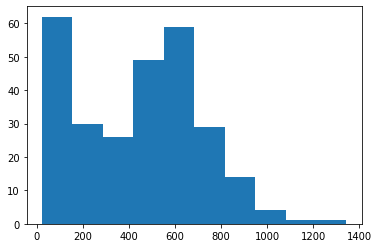

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.hist(many_int['errs_interrupts_num'])
plt.show()


In [53]:
many_int['errs_interrupts_num']

1      775
7      738
35     698
53     613
153    582
      ... 
874    105
878    108
882    204
883    109
886     87
Name: errs_interrupts_num, Length: 275, dtype: int64

In [ ]:
# construct the table the includes all the quality information abo
# see the difference between gen1 and gen2

In [ ]:
# check how many didn't finish processing succesfully 
log_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/clusterLogs'


['enmoTrunc', 'xRange', 'yRange', 'zRange', 'xStd', 'yStd', 'zStd', 'temp', 'samples', 'dataErrors', 'clipsBeforeCalibr', 'clipsAfterCalibr', 'rawSamples']


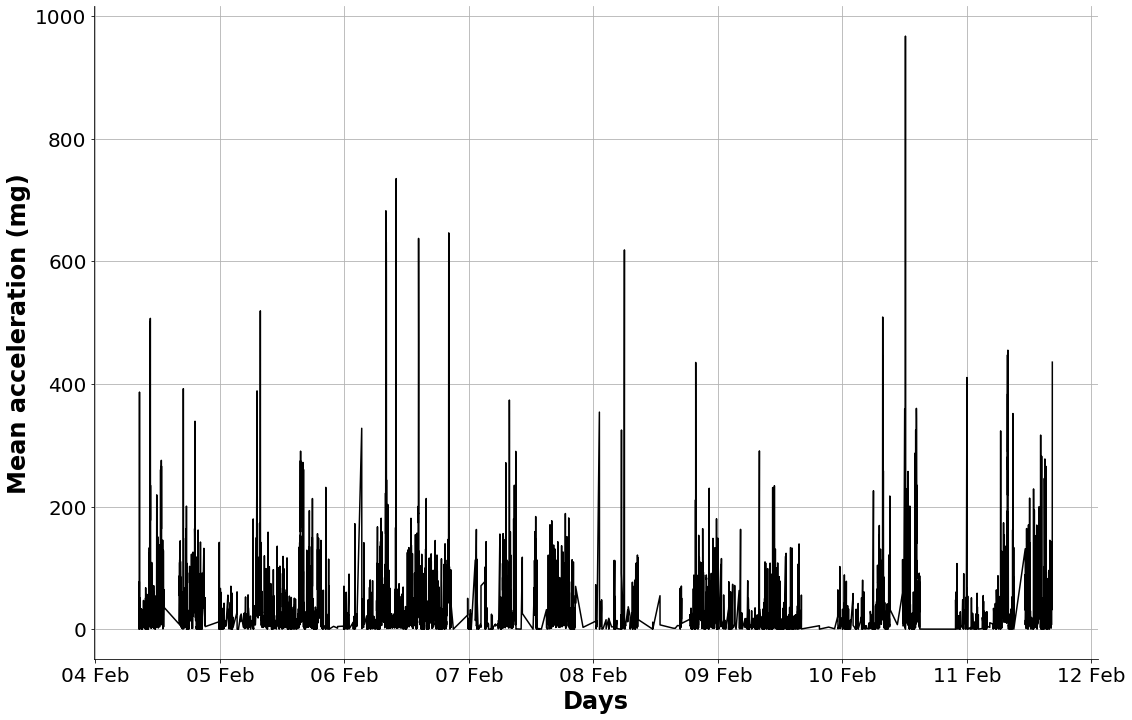

In [100]:

my_csv_path ='/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/595524_wrist_2014-02-04-epoch.csv.gz'


#my_csv_path = '~/Documents/770757_wrist_2017-04-11-epoch.csv'
e = pd.read_csv(my_csv_path, index_col=0, parse_dates=['time'], compression='gzip').sort_index()
cols = ['enmoTrunc','xRange','yRange','zRange']                             
cols += ['xStd','yStd','zStd','temp','samples']                             
cols += ['dataErrors','clipsBeforeCalibr','clipsAfterCalibr','rawSamples']
# e.columns = cols
print(cols)
e = e[cols]
x = e.index                                                         
y = e['enmoTrunc']*1000                                                       

f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
my_dates = e.index
# f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
# my_x = list(map(f, my_dates))
my_x = list(map(f, my_dates))

fig,ax = plt.subplots(1,1,sharex=False, sharey=False, figsize=(18,12))          
ax.grid(True)                                                  
ax.plot(my_x, y, color='black', label='lab')                                       



#ax.set_title('titleLabel', fontsize=16, fontweight='bold')                        
#format x-axis                                                                  
#ax.set_xlabel(xLabel, fontsize=16, fontweight='bold')                           
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))                     
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3))                                
ax.tick_params(axis='x', which='major', labelsize=20, grid_visible=True)      

# loc = matplotlib.ticker.FixedLocator(matplotlib.dates.date2num(my_x))
# fmt = matplotlib.dates.DateFormatter('%d-%b')
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(fmt)
# plt.gcf().auto

#format y-axis                                                                  
ax.tick_params(axis='y', which='major', labelsize=20)                           
#ax.set_ylim(-100,500)                                                           
#format plot area                                                               
ax.spines['right'].set_visible(False)                                           
ax.spines['top'].set_visible(False)                                             
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left')                                             
                                                                                
#defined shared y-axis                                                          
ax.set_ylabel('Mean acceleration (mg)', fontsize=24, fontweight='bold')   
ax.set_xlabel('Days', fontsize=24, fontweight='bold')                           

plt.savefig('test.png')
plt.show() 

['enmoTrunc', 'xRange', 'yRange', 'zRange', 'xStd', 'yStd', 'zStd', 'temp', 'samples', 'dataErrors', 'clipsBeforeCalibr', 'clipsAfterCalibr', 'rawSamples']


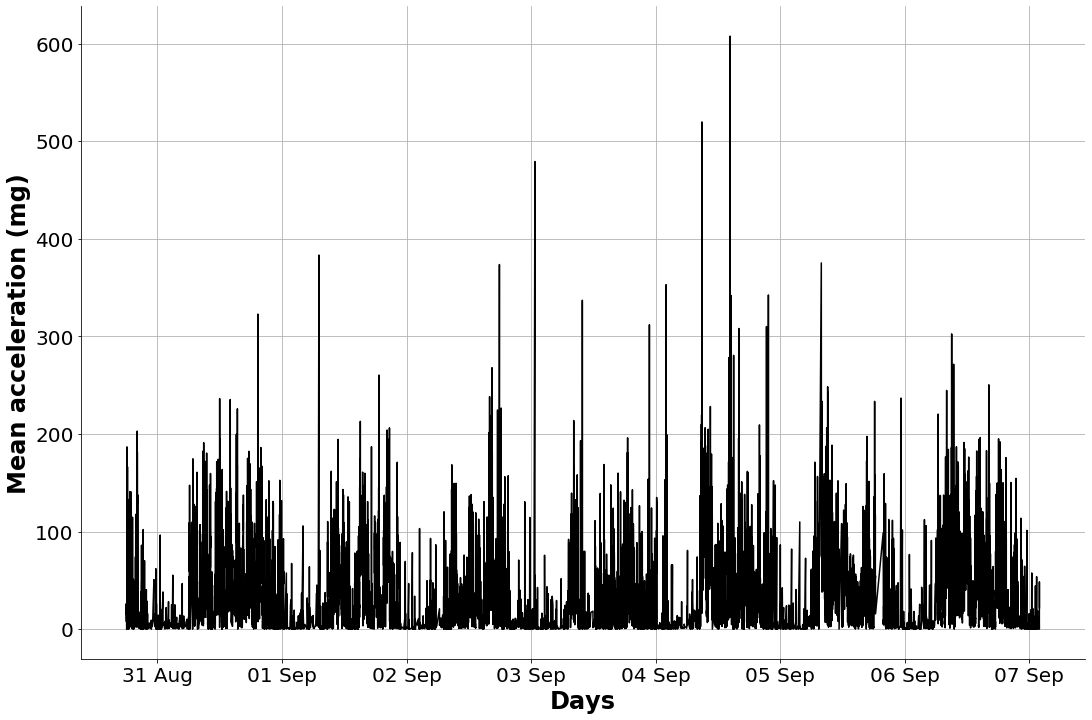

In [82]:

my_csv_path ='/well/doherty/projects/raine/gen1_26/gt3x/wrist/baseline_oct8/epoch/843822_wrist_2016-08-30-epoch.csv.gz'


#my_csv_path = '~/Documents/770757_wrist_2017-04-11-epoch.csv'
e = pd.read_csv(my_csv_path, index_col=0, parse_dates=['time'], compression='gzip').sort_index()
cols = ['enmoTrunc','xRange','yRange','zRange']                             
cols += ['xStd','yStd','zStd','temp','samples']                             
cols += ['dataErrors','clipsBeforeCalibr','clipsAfterCalibr','rawSamples']
# e.columns = cols
print(cols)
e = e[cols]
x = e.index                                                         
y = e['enmoTrunc']*1000                                                       

f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
my_dates = e.index
# f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
# my_x = list(map(f, my_dates))
my_x = list(map(f, my_dates))

fig,ax = plt.subplots(1,1,sharex=False, sharey=False, figsize=(18,12))          
ax.grid(True)                                                  
ax.plot(my_x, y, color='black', label='lab')                                       



#ax.set_title('titleLabel', fontsize=16, fontweight='bold')                        
#format x-axis                                                                  
#ax.set_xlabel(xLabel, fontsize=16, fontweight='bold')                           
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))                     
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3))                                
ax.tick_params(axis='x', which='major', labelsize=20, grid_visible=True)      

# loc = matplotlib.ticker.FixedLocator(matplotlib.dates.date2num(my_x))
# fmt = matplotlib.dates.DateFormatter('%d-%b')
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(fmt)
# plt.gcf().auto

#format y-axis                                                                  
ax.tick_params(axis='y', which='major', labelsize=20)                           
#ax.set_ylim(-100,500)                                                           
#format plot area                                                               
ax.spines['right'].set_visible(False)                                           
ax.spines['top'].set_visible(False)                                             
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left')                                             
                                                                                
#defined shared y-axis                                                          
ax.set_ylabel('Mean acceleration (mg)', fontsize=24, fontweight='bold')   
ax.set_xlabel('Days', fontsize=24, fontweight='bold')                           

plt.savefig('test.png')
plt.show() 

['enmoTrunc', 'xRange', 'yRange', 'zRange', 'xStd', 'yStd', 'zStd', 'temp', 'samples', 'dataErrors', 'clipsBeforeCalibr', 'clipsAfterCalibr', 'rawSamples']


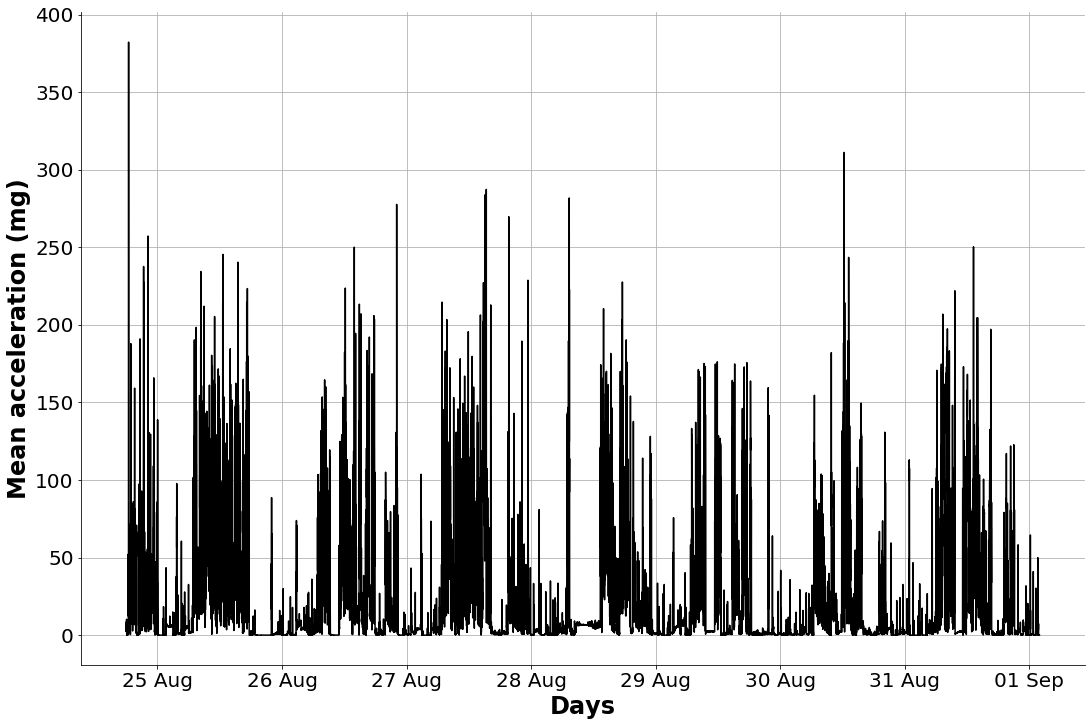

In [83]:
import matplotlib.dates as mdates   
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.ticker
import datetime


my_csv_path ='/well/doherty/projects/raine/gen1_26/gt3x/wrist/baseline_oct8/epoch/535007_wrist_2015-08-24-epoch.csv.gz'


#my_csv_path = '~/Documents/770757_wrist_2017-04-11-epoch.csv'
e = pd.read_csv(my_csv_path, index_col=0, parse_dates=['time'], compression='gzip').sort_index()
cols = ['enmoTrunc','xRange','yRange','zRange']                             
cols += ['xStd','yStd','zStd','temp','samples']                             
cols += ['dataErrors','clipsBeforeCalibr','clipsAfterCalibr','rawSamples']
# e.columns = cols
print(cols)
e = e[cols]
x = e.index                                                         
y = e['enmoTrunc']*1000                                                       

f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
my_dates = e.index
# f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
# my_x = list(map(f, my_dates))
my_x = list(map(f, my_dates))

fig,ax = plt.subplots(1,1,sharex=False, sharey=False, figsize=(18,12))          
ax.grid(True)                                                  
ax.plot(my_x, y, color='black', label='lab')                                       



#ax.set_title('titleLabel', fontsize=16, fontweight='bold')                        
#format x-axis                                                                  
#ax.set_xlabel(xLabel, fontsize=16, fontweight='bold')                           
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))                     
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3))                                
ax.tick_params(axis='x', which='major', labelsize=20, grid_visible=True)      

# loc = matplotlib.ticker.FixedLocator(matplotlib.dates.date2num(my_x))
# fmt = matplotlib.dates.DateFormatter('%d-%b')
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(fmt)
# plt.gcf().auto

#format y-axis                                                                  
ax.tick_params(axis='y', which='major', labelsize=20)                           
#ax.set_ylim(-100,500)                                                           
#format plot area                                                               
ax.spines['right'].set_visible(False)                                           
ax.spines['top'].set_visible(False)                                             
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left')                                             
                                                                                
#defined shared y-axis                                                          
ax.set_ylabel('Mean acceleration (mg)', fontsize=24, fontweight='bold')   
ax.set_xlabel('Days', fontsize=24, fontweight='bold')                           

plt.savefig('test.png')
plt.show() 

In [65]:
# get the distribution for firmware

In [11]:
import glob
import zipfile

file_desp1 = '/well/doherty/users/cxx579/project_data/raine/gen1_26/gt3x/wrist/*.gt3x'

file_desp2 = '/well/doherty/projects/raine/gen1_26/gt3x/wrist/*.gt3x'
gen1_tmp = '/well/doherty/projects/raine/gen1_26/gt3x/wrist/tmp'
txt_dir = gen1_tmp + '/info.txt'
file_list = glob.glob(file_desp2)

In [13]:
def getFirmWare(file_lines):
    for line in Lines:
        str_segs = line.split(':')
        if str_segs[0] == 'Firmware':
            return str_segs[1]
    return " "

In [15]:
firm_wares = []
i = 0
for c_file in file_list:
    i += 1
    with zipfile.ZipFile(c_file, 'r') as zip_ref:
        zip_ref.extractall(gen1_tmp)
    if i % 20 == 0:
        print(i)
    file1 = open(txt_dir, 'r')
    Lines = file1.readlines()
    firm_wares.append(getFirmWare(Lines))


20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020


In [16]:
mydata = {"file_name": file_list,
     "firm_ware": firm_wares}
mydf = pd.DataFrame(mydata)

In [103]:
mydf = pd.read_csv('/well/doherty/users/cxx579/project_data/raine/gen1_26/gt3x/wrist/firmwave_gen2.csv')

In [102]:
my_firmware

,Unnamed: 0,file_name,firm_ware
0,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,2.4.0\n
1,1,/well/doherty/projects/raine/gen2_22/gt3x/wris...,2.4.0\n
2,2,/well/doherty/projects/raine/gen2_22/gt3x/wris...,1.1.22\n
3,3,/well/doherty/projects/raine/gen2_22/gt3x/wris...,1.1.22\n
4,4,/well/doherty/projects/raine/gen2_22/gt3x/wris...,2.2.1\n
...,...,...,...
885,885,/well/doherty/projects/raine/gen2_22/gt3x/wris...,2.2.1\n
886,886,/well/doherty/projects/raine/gen2_22/gt3x/wris...,1.1.22\n
887,887,/well/doherty/projects/raine/gen2_22/gt3x/wris...,2.1.0\n
888,888,/well/doherty/projects/raine/gen2_22/gt3x/wris...,2.2.1\n


In [17]:
mydf.to_csv('/well/doherty/users/cxx579/project_data/raine/gen1_26/gt3x/wrist/firmwaregen1.csv')

In [24]:
mydf

,file_name,firm_ware
0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.5.0\n
1,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.5.0\n
2,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.4.0\n
3,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.3.0\n
4,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.4.0\n
...,...,...
1034,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.5.0\n
1035,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.4.0\n
1036,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.3.0\n
1037,/well/doherty/projects/raine/gen1_26/gt3x/wris...,2.4.0\n


In [104]:
fw_df2= gen2df_full.join(mydf.set_index('file_name'), on='file_name')

In [105]:
fw_df2

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok,test_interrupts_num_ok,Unnamed: 0,firm_ware
0,33.53756,41,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,False,732,2.2.1\n
1,51.18042,55,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,False,455,1.1.22\n
2,23.68676,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,True,True,False,611,1.1.22\n
3,21.64048,147,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,False,210,1.1.22\n
4,12.91305,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,False,False,True,True,False,607,2.4.0\n
...,...,...,...,...,...,...,...,...,...,...,...,...
885,3.41579,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,True,True,False,652,2.4.0\n
886,18.71490,87,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True,False,387,2.2.1\n
887,19.95177,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,True,True,False,889,2.2.1\n
888,19.65843,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,True,True,False,453,1.2.7\n


In [28]:
fw_df1= gen1df_full.join(mydf.set_index('file_name'), on='file_name')
fw_df2= gen2df_full.join(mydf.set_index('file_name'), on='file_name')

In [108]:
select_df = fw_df2[['file_name', 'errs_interrupts_num', 'firm_ware']]

In [109]:
DFManyInts = select_df[select_df['errs_interrupts_num'] > 10]
DFFewInts = select_df[select_df['errs_interrupts_num'] <= 10]


In [127]:
select_df[(select_df['firm_ware'] != "2.2.1\n") & (select_df['firm_ware'] != '1.1.22\n') & (select_df['firm_ware'] != '1.2.7\n')]

,file_name,errs_interrupts_num,firm_ware
0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,41,2.2.1\n
1,/well/doherty/projects/raine/gen2_22/gt3x/wris...,55,1.1.22\n
2,/well/doherty/projects/raine/gen2_22/gt3x/wris...,0,1.1.22\n
3,/well/doherty/projects/raine/gen2_22/gt3x/wris...,147,1.1.22\n
4,/well/doherty/projects/raine/gen2_22/gt3x/wris...,0,2.4.0\n
...,...,...,...
885,/well/doherty/projects/raine/gen2_22/gt3x/wris...,0,2.4.0\n
886,/well/doherty/projects/raine/gen2_22/gt3x/wris...,87,2.2.1\n
887,/well/doherty/projects/raine/gen2_22/gt3x/wris...,0,2.2.1\n
888,/well/doherty/projects/raine/gen2_22/gt3x/wris...,0,1.2.7\n


In [112]:
DFManyInts['firm_ware'].value_counts()

 2.2.1\n     142
 1.1.22\n     75
 1.2.7\n      35
Name: firm_ware, dtype: int64

In [130]:
193+191+68+23

475

In [110]:
DFFewInts['firm_ware'].value_counts()

 2.1.0\n     193
 2.4.0\n     191
 2.2.1\n     104
 2.5.0\n      68
 1.2.7\n      59
 1.1.22\n     23
Name: firm_ware, dtype: int64

In [49]:
for i in range(len(DFFewInts)):
    print(DFFewInts.iloc[i]['file_name'])

/well/doherty/projects/raine/gen1_26/gt3x/wrist/535007_wrist_2015-08-24.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/258301_wrist_2016-08-15.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/920185_wrist_2016-10-17.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/206665_wrist_2017-01-18.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/263047_wrist_2017-02-08.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/278758_wrist_2015-08-24.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/490075_wrist_2017-04-04.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/572257_wrist_2015-11-25.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/454207_wrist_2016-01-28.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/568641_wrist_2015-08-19.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/769324_wrist_2016-09-20.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/819625_wrist_2016-03-31.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/256802_wrist_2017-05-04.gt3x

In [48]:
for i in range(len(DFManyInts)):
    print(DFManyInts.iloc[i]['file_name'])

/well/doherty/projects/raine/gen1_26/gt3x/wrist/843822_wrist_2016-08-30.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/455217_wrist_2016-08-30.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/528922_wrist_2016-08-08.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/692409_wrist_2016-08-26.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/336637_wrist_2016-09-01.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/301790_wrist_2016-08-08.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/724246_wrist_2016-08-08.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/373066_wrist_2016-09-01.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/531980_wrist_2016-08-26.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/120226_wrist_2016-08-26.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/522554_wrist_2016-08-29.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/154201_wrist_2016-08-29.gt3x
/well/doherty/projects/raine/gen1_26/gt3x/wrist/605324_wrist_2016-08-31.gt3x

In [33]:
DFManyInts['firm_ware'].value_counts()

 2.5.0\n    22
 3.2.1\n     1
Name: firm_ware, dtype: int64

In [33]:
select_df['firm_ware'].v

AttributeError: 'DataFrame' object has no attribute 'valu'